In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('Debernardi et al 2020 data.csv')

In [6]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

Lets start with cleaning some of this data. In columns 'stage' and 'benign_sample_diagnosis' the missing values need to be filled with '0' and 'no diagnosis'.

In [11]:
df['stage'].fillna(0, inplace=True)
df['benign_sample_diagnosis'].fillna('No Diagnosis', inplace=True)

# Remove sample_origin column as it's not needed
df.drop('sample_origin', axis=1, inplace=True)

df.head()

/var/folders/hv/qg5649zd28s08v46rghx5qvw0000gp/T/ipykernel_70888/3085332415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stage'].fillna(0, inplace=True)
/var/folders/hv/qg5649zd28s08v46rghx5qvw0000gp/T/ipykernel_70888/3085332415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,sample_id,patient_cohort,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,33,F,1,0,No Diagnosis,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,81,F,1,0,No Diagnosis,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,51,M,1,0,No Diagnosis,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,61,M,1,0,No Diagnosis,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,62,M,1,0,No Diagnosis,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [13]:
# To fill in the missing values for plasma_CA19_9 we will find the mean and std based upon the 'stage', then fill in a random value in missing values.
import numpy as np

# Calculate mean and standard deviation of CA 19-9 for each stage
stage_stats = df.groupby('stage')['plasma_CA19_9'].agg(['mean', 'std']).reset_index()

# Define a function to fill missing values with random values
def random_fill(row):
    if pd.isna(row['plasma_CA19_9']):
        mean = stage_stats.loc[stage_stats['stage'] == row['stage'], 'mean'].values[0]
        std = stage_stats.loc[stage_stats['stage'] == row['stage'], 'std'].values[0]
        return np.random.normal(mean, std)  # Generate random value from normal distribution
    return row['plasma_CA19_9']

# Apply the function to fill missing values in 'plasma_CA19_9'
df['plasma_CA19_9'] = df.apply(random_fill, axis=1)

In [19]:
# Drop rows where 'plasma_CA19_9' is NaN
df.dropna(subset=['plasma_CA19_9'], inplace=True)

In [21]:
# Calculate mean and standard deviation of REG1A levels for each stage
reg1a_stats = df.groupby('stage')['REG1A'].agg(['mean', 'std']).reset_index()

# Define a function to fill missing REG1A values with random values
def reg1a_random_fill(row):
    if pd.isna(row['REG1A']):
        mean = reg1a_stats.loc[reg1a_stats['stage'] == row['stage'], 'mean'].values[0]
        std = reg1a_stats.loc[reg1a_stats['stage'] == row['stage'], 'std'].values[0]
        return np.random.normal(mean, std)  # Generate random value from normal distribution
    return row['REG1A']

# Apply the function to fill missing values in 'REG1A'
df['REG1A'] = df.apply(reg1a_random_fill, axis=1)

In [23]:
df.head()

,sample_id,patient_cohort,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,33,F,1,0,No Diagnosis,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,S10,Cohort1,81,F,1,0,No Diagnosis,-121.344375,0.97266,2.037585,94.46703,209.488250,228.407000
2,S100,Cohort2,51,M,1,0,No Diagnosis,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083
3,S101,Cohort2,61,M,1,0,No Diagnosis,8.000000,0.70122,0.002805,60.57900,142.950000,-2.226258
4,S102,Cohort2,62,M,1,0,No Diagnosis,9.000000,0.21489,0.000860,65.54000,41.088000,-767.764159


In [25]:
# I did not take into account the random generation would generate negative values 
# Convert all values in 'plasma_CA19_9' to absolute values
df['plasma_CA19_9'] = df['plasma_CA19_9'].abs()

# Convert all values in 'REG1A' to absolute values
df['REG1A'] = df['REG1A'].abs()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                582 non-null    object 
 1   patient_cohort           582 non-null    object 
 2   age                      582 non-null    int64  
 3   sex                      582 non-null    object 
 4   diagnosis                582 non-null    int64  
 5   stage                    582 non-null    object 
 6   benign_sample_diagnosis  582 non-null    object 
 7   plasma_CA19_9            582 non-null    float64
 8   creatinine               582 non-null    float64
 9   LYVE1                    582 non-null    float64
 10  REG1B                    582 non-null    float64
 11  TFF1                     582 non-null    float64
 12  REG1A                    582 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 63.7+ KB


EDA

The average age of the patients in the dataset is 59.0 years.


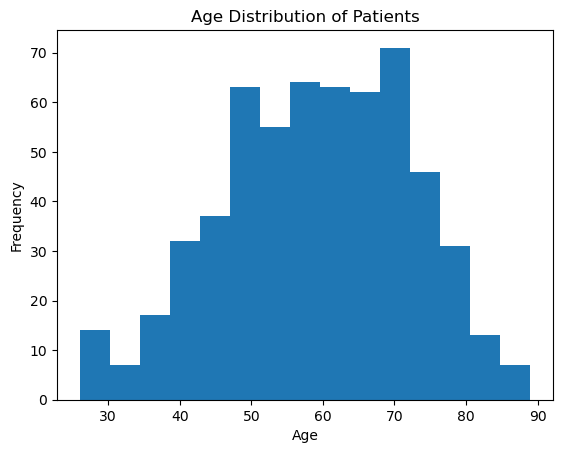

In [30]:
## Lets start with EDA

# First lets get to know a bit about our patients in dataset.

import matplotlib.pyplot as plt

mean_age = df['age'].mean()
print(f"The average age of the patients in the dataset is {mean_age:.1f} years.")

plt.hist(df['age'], bins=15)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


We will group patients by age and diagnosis. Diagnosis 1 means control (no pancreatic disease). 2 means benign hepatobiliary disease (119 of which are chronic pancreatitis). And 3 means Pancreatic ductal adenocarcinoma, i.e. pancreatic cancer.
The average age of patients with diagnosis 1 is 56.3 years.
The average age of patients with diagnosis 2 is 54.7 years.
The average age of patients with diagnosis 3 is 66.1 years.


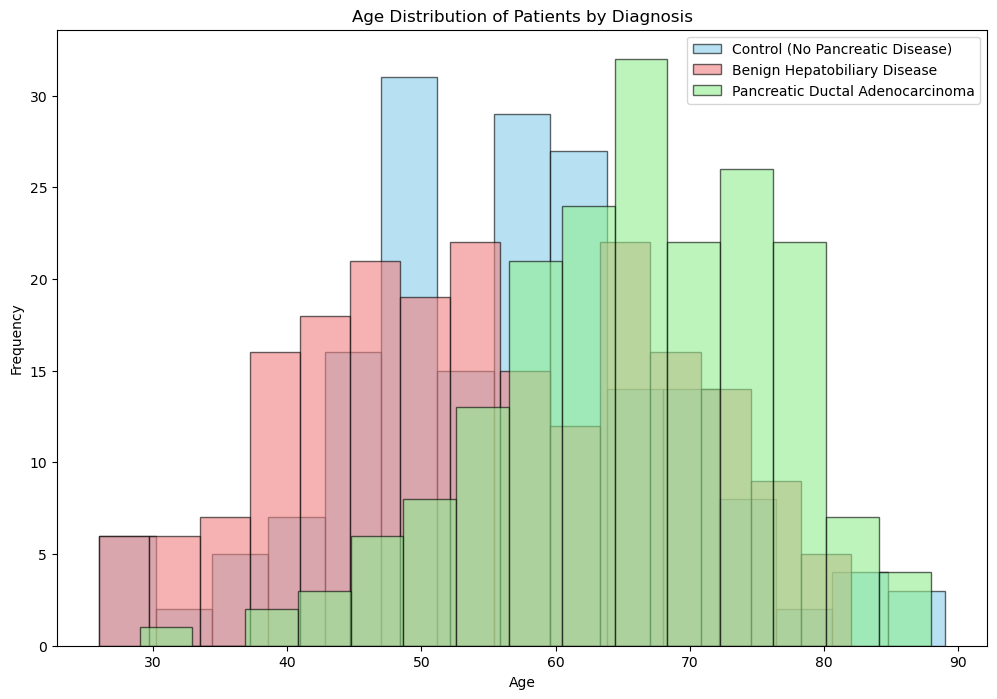

In [32]:
# Now lets group the patients by their diagnosis and age to see if certain age groups are more susceptible

print('We will group patients by age and diagnosis. Diagnosis 1 means control (no pancreatic disease). 2 means benign hepatobiliary disease (119 of which are chronic pancreatitis). And 3 means Pancreatic ductal adenocarcinoma, i.e. pancreatic cancer.')

mean_age_by_diagnosis = df.groupby('diagnosis')['age'].mean()
for diagnosis, mean_age in mean_age_by_diagnosis.items():
    print(f"The average age of patients with diagnosis {diagnosis} is {mean_age:.1f} years.")

plt.figure(figsize=(12, 8))
diagnosis_labels = {1: 'Control (No Pancreatic Disease)', 2: 'Benign Hepatobiliary Disease', 3: 'Pancreatic Ductal Adenocarcinoma'}
colors = ['skyblue', 'lightcoral', 'lightgreen']

for diagnosis, color in zip(df['diagnosis'].unique(), colors):
    subset = df[df['diagnosis'] == diagnosis]
    plt.hist(subset['age'], bins=15, color=color, edgecolor='black', alpha=0.6, label=f"{diagnosis_labels[diagnosis]}")

plt.title('Age Distribution of Patients by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

To get a better understanding of the distribution of diagnoses, we will use a pie chart.


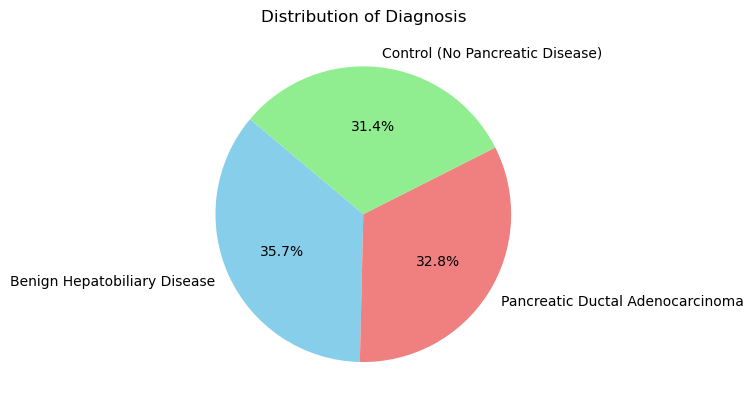

Based on this pie chart we can see that the amount of people from each diagnosis level is distributed relatively even.


In [34]:
print('To get a better understanding of the distribution of diagnoses, we will use a pie chart.')

diagnosis_counts = df['diagnosis'].value_counts()

diagnosis_labels = {1: 'Control (No Pancreatic Disease)', 2: 'Benign Hepatobiliary Disease', 3: 'Pancreatic Ductal Adenocarcinoma'}
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.pie(diagnosis_counts, labels=[diagnosis_labels[i] for i in diagnosis_counts.index], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Diagnosis')
plt.show()

print('Based on this pie chart we can see that the amount of people from each diagnosis level is distributed relatively even.')

Now lets take a look at sex. What is the average age for males and females in this study, and what portion of dataset do they make up?
The average age of patients who are F is 58.5 years.
The average age of patients who are M is 59.4 years.


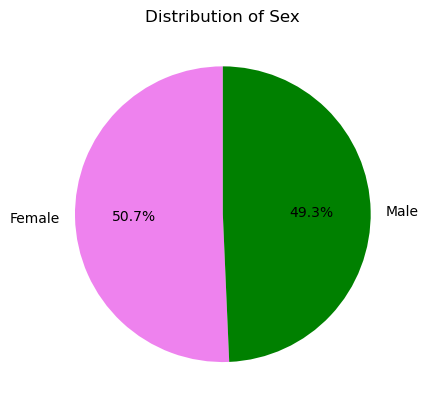

Seeing that the average age of both males and females in this study is relatively close, we can assume there is balance in the data and that both profiles are comparable.


In [36]:
print('Now lets take a look at sex. What is the average age for males and females in this study, and what portion of dataset do they make up?')

mean_age_by_sex = df.groupby('sex')['age'].mean()
for sex, mean_age in mean_age_by_sex.items():
    print(f"The average age of patients who are {sex} is {mean_age:.1f} years.")


sex_counts = df['sex'].value_counts()

sex_labels = {'M': 'Male', 'F': 'Female'}
colors = ['violet', 'green']

plt.pie(sex_counts, labels=[sex_labels[i] for i in sex_counts.index], autopct='%1.1f%%', startangle = 90, colors=colors)
plt.title('Distribution of Sex')
plt.show()

print('Seeing that the average age of both males and females in this study is relatively close, we can assume there is balance in the data and that both profiles are comparable.')


We will also take a quick look at the distribution of patient cohort.


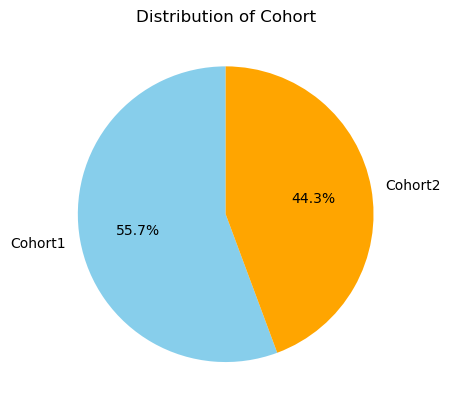

In [38]:
print('We will also take a quick look at the distribution of patient cohort.')

cohort_counts = df['patient_cohort'].value_counts()

colors = ['skyblue', 'orange']

plt.pie(cohort_counts, labels=cohort_counts.index, autopct='%1.1f%%', startangle = 90, colors=colors)
plt.title('Distribution of Cohort')
plt.show()



Lets take a look at sex distribution within each diagnosis level to see if there are any gender differences.


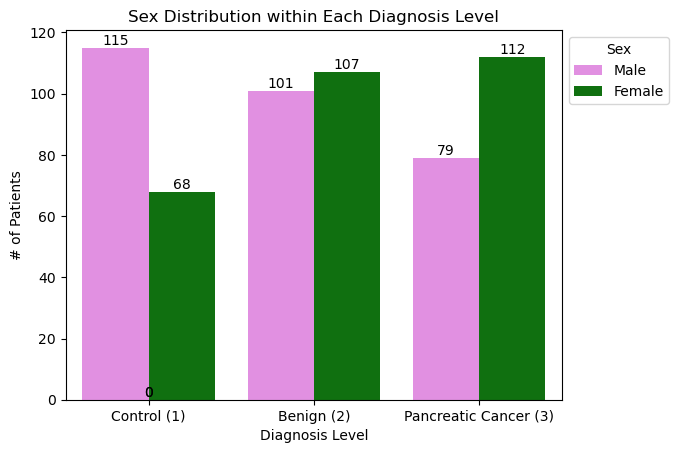

In [42]:
print('Lets take a look at sex distribution within each diagnosis level to see if there are any gender differences.')

import seaborn as sns

ax = sns.countplot(data=df, x='diagnosis', hue='sex', palette={'M': 'green', 'F': 'violet'})
plt.title('Sex Distribution within Each Diagnosis Level')
plt.xlabel('Diagnosis Level')
plt.ylabel('# of Patients')
plt.xticks(ticks=[0, 1, 2], labels=['Control (1)', 'Benign (2)', 'Pancreatic Cancer (3)'])
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

Looking at the chart. In the Control diagnosis group less males are prevalent. In the benign group the distribution seems fairly balanced. And in the cancer group males are more prvelant. This could indicate that pancreatic cancer is more common amongst males. A chi-square test could be conducted to see if there are great differences within the distribution.

Now that we have an understanding of basic patient demographics. Lets dive into the stage and diagnosis samples that each of these patients have.


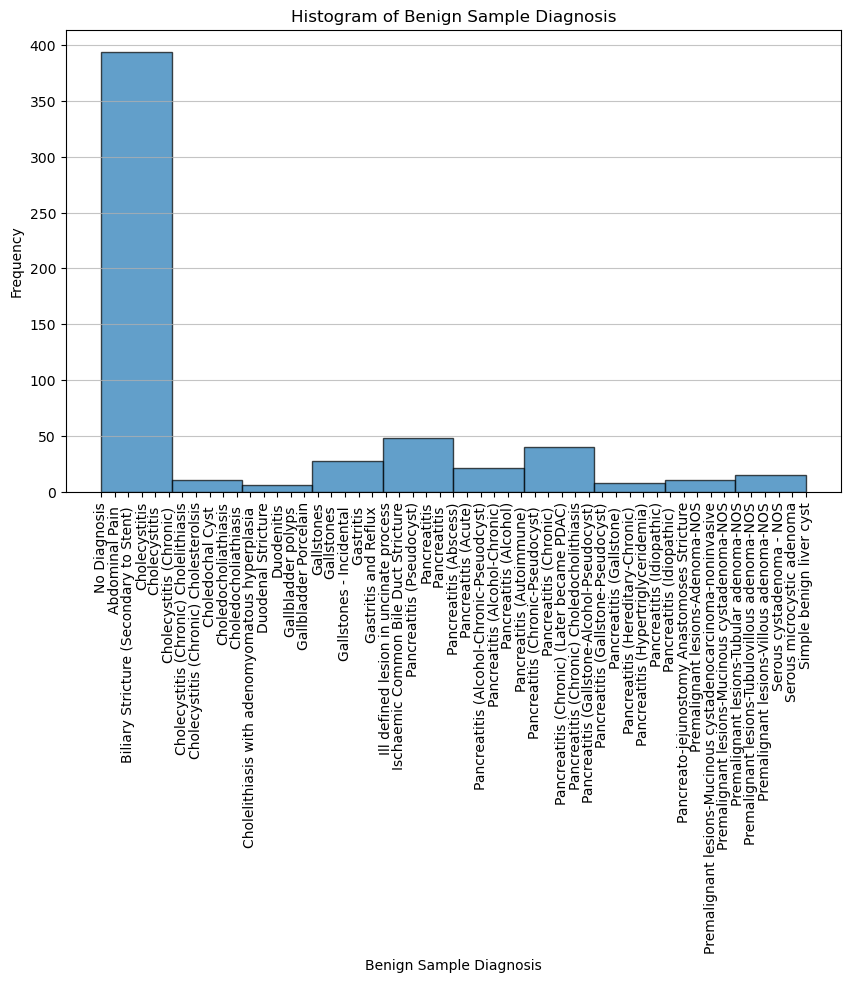

In [47]:
print('Now that we have an understanding of basic patient demographics. Lets dive into the stage and diagnosis samples that each of these patients have.')

plt.figure(figsize=(10, 6))
plt.hist(df['benign_sample_diagnosis'], edgecolor='black', alpha=0.7)
plt.title('Histogram of Benign Sample Diagnosis')
plt.xlabel('Benign Sample Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

No diagnosis, abdominal pain, biliary stricture, and cholecystitis seem to make up most of the benign sample diagnoses.

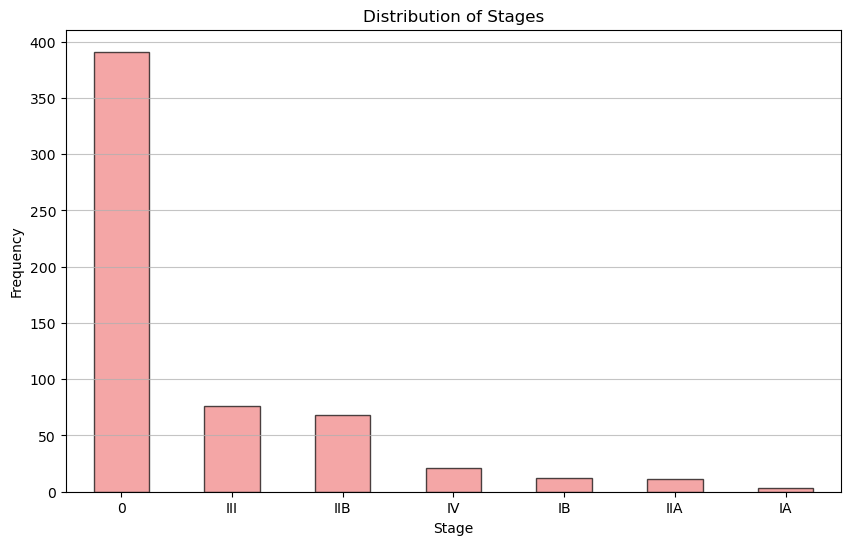

In [50]:
stage_counts = df['stage'].value_counts()

plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Stages')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis='y', alpha=0.75)

plt.show()

We can see two things here. First thing is the biggest group of people are stage 0 but the other half of the data are patients with a stage designation. The second thing we can see is that from the half of the patients who have a stage level designation, stage III and IIB are most common amonst people in this study.

<Figure size 1000x600 with 0 Axes>

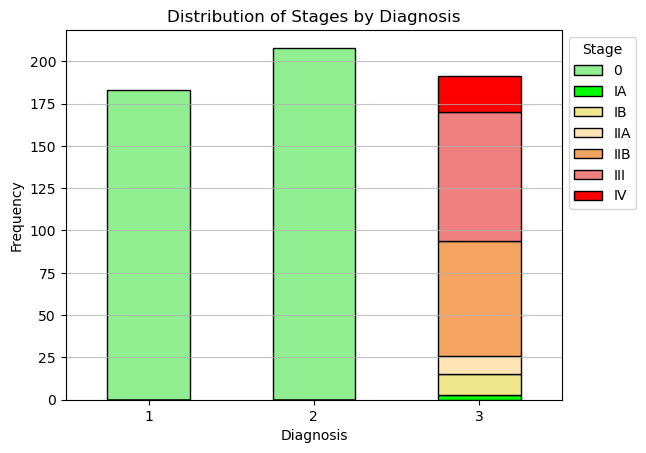

In [53]:
stage_diagnosis_counts = df.groupby(['diagnosis', 'stage']).size().unstack()

plt.figure(figsize=(10, 6))
stage_diagnosis_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'lime', 'khaki', 'moccasin', 'sandybrown', 'lightcoral', 'red'], edgecolor='black')

plt.title('Distribution of Stages by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Stage', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


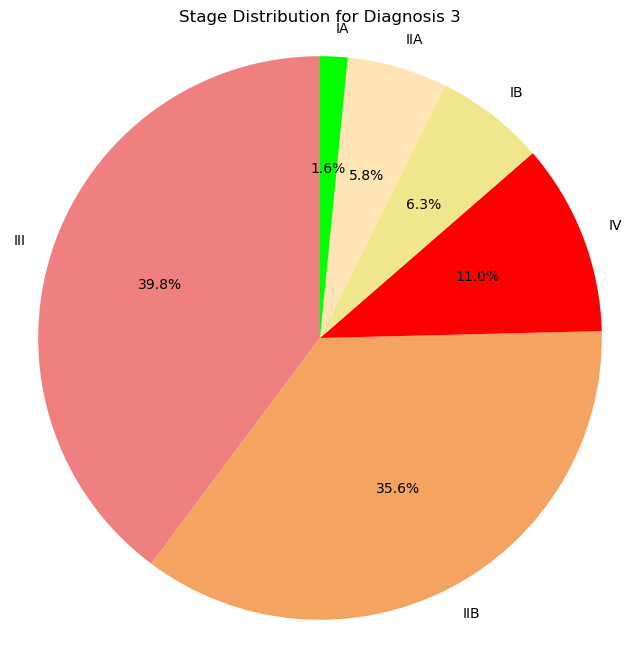

In [55]:
diagnosis_3_data = df[df['diagnosis'] == 3]

stage_counts_diagnosis_3 = diagnosis_3_data['stage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stage_counts_diagnosis_3, labels=stage_counts_diagnosis_3.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'sandybrown', 'red', 'khaki', 'moccasin', 'lime', 'red'])
plt.title('Stage Distribution for Diagnosis 3')
plt.axis('equal')  
plt.show()

Here we have a pie chart showing the various percentages of people and what stage of ductal adenocarcinoma they have been classified with.

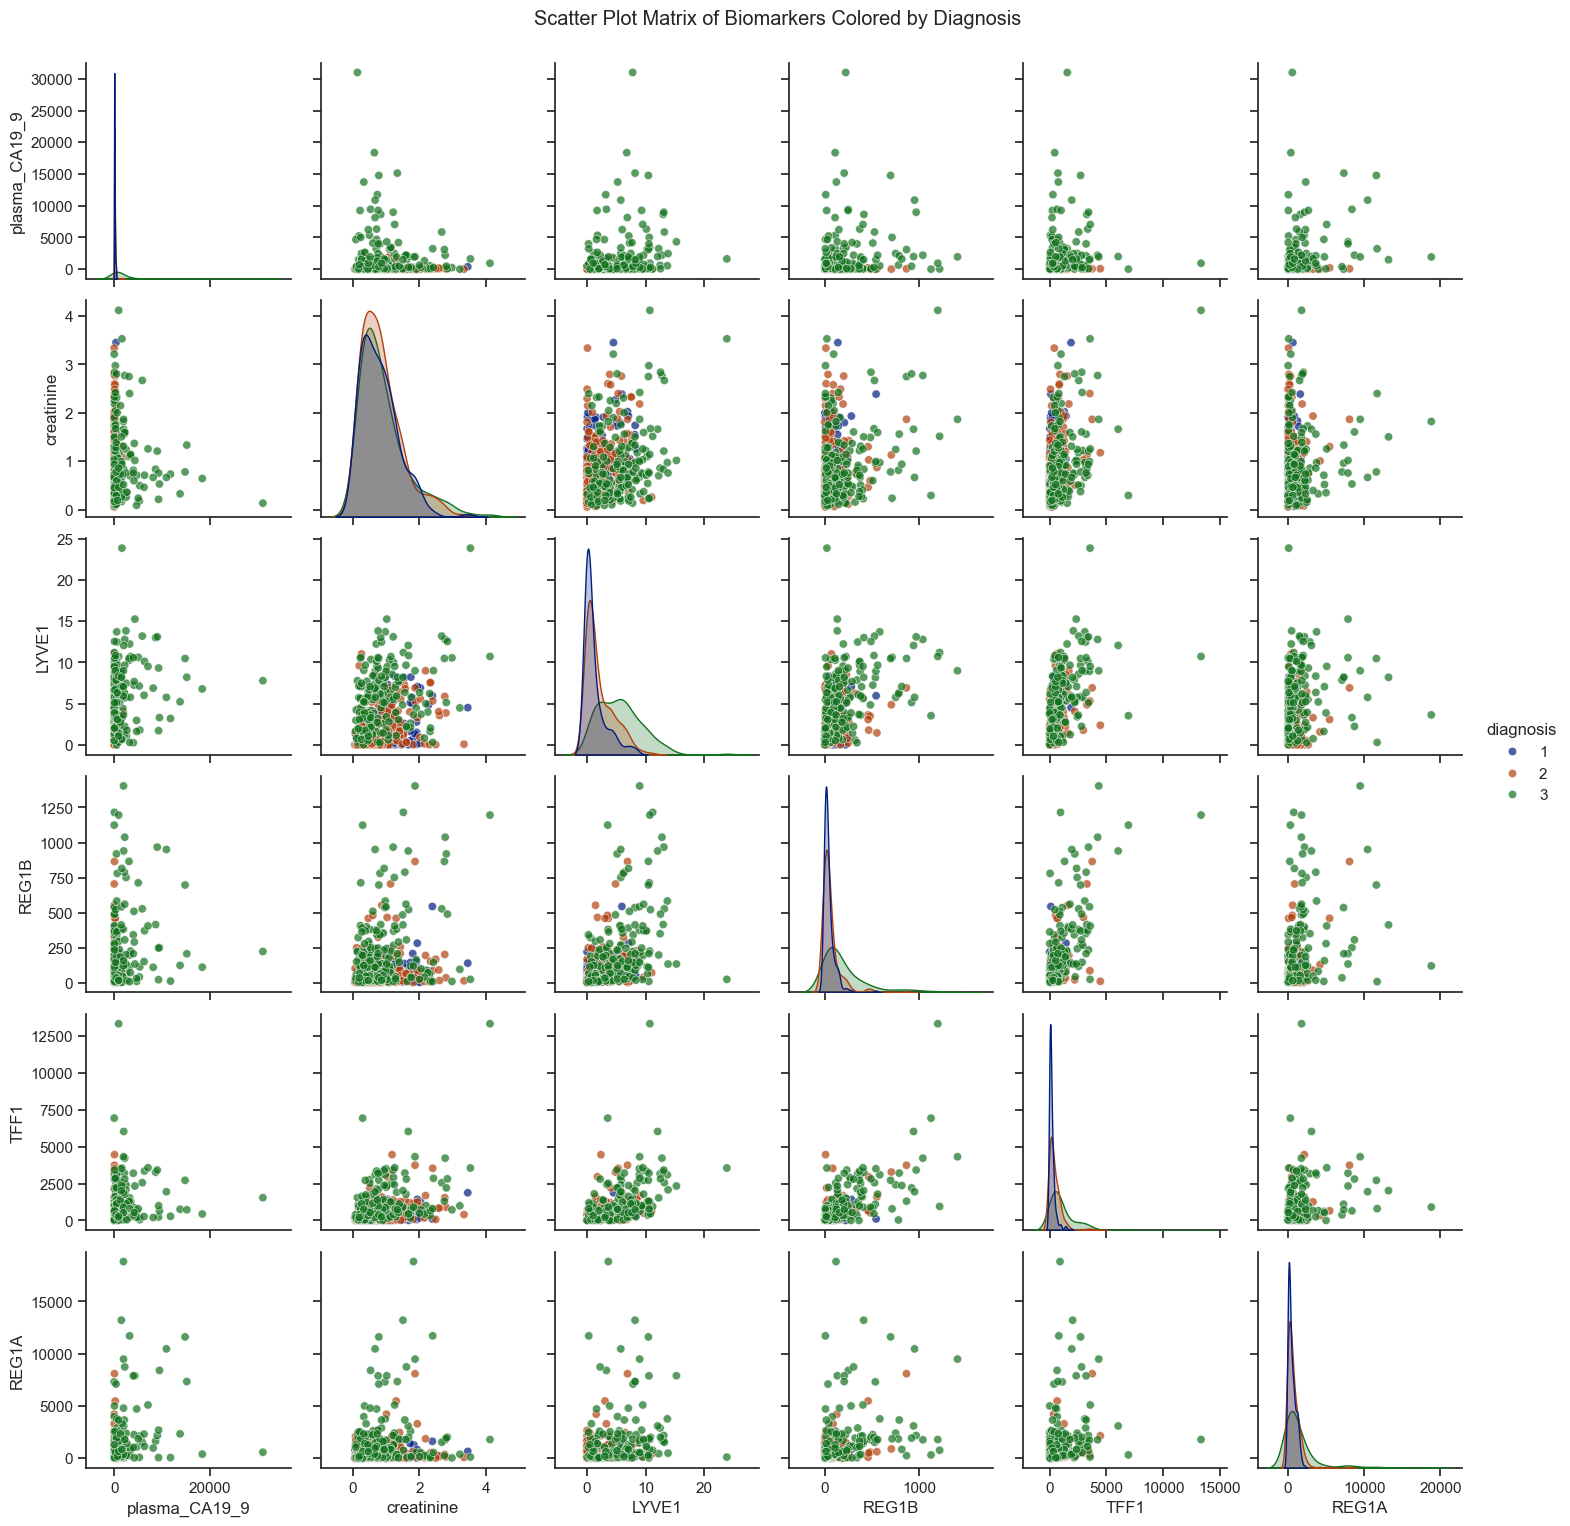

In [60]:
biomarkers = ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']
sns.set(style="ticks")

sns.pairplot(df[biomarkers + ['diagnosis']], hue='diagnosis', palette='dark', plot_kws={'alpha':0.7})

plt.suptitle('Scatter Plot Matrix of Biomarkers Colored by Diagnosis', y=1.02)
plt.show()

In [61]:
diagnosis_group_stats = df.groupby('diagnosis')[biomarkers].describe()
print(diagnosis_group_stats)

          plasma_CA19_9                                             \
                  count         mean          std  min         25%   
diagnosis                                                            
1                 183.0    75.033262    99.544617  0.0    5.076753   
2                 208.0    96.946953   190.167276  1.0   13.982592   
3                 191.0  1928.475368  3665.415246  0.6  151.350000   

                                                 creatinine            ...  \
                  50%          75%           max      count      mean  ...   
diagnosis                                                              ...   
1           19.960093   122.211352    431.273854      183.0  0.797633  ...   
2           32.150000   114.426858   1913.000000      208.0  0.847929  ...   
3          555.354067  1921.748700  31000.000000      191.0  0.914452  ...   

                  TFF1                REG1A                                 \
                   75%          

In [64]:
for diag in df['diagnosis'].unique():
    diag_data = df[df['diagnosis'] == diag]
    corr_matrix = diag_data[biomarkers].corr()
    print(f"Correlation matrix for Diagnosis {diag}:\n", corr_matrix)

Correlation matrix for Diagnosis 1:
                plasma_CA19_9  creatinine     LYVE1     REG1B      TFF1  \
plasma_CA19_9       1.000000    0.154443  0.309102  0.057282  0.215187   
creatinine          0.154443    1.000000  0.536422  0.472423  0.599006   
LYVE1               0.309102    0.536422  1.000000  0.438768  0.648910   
REG1B               0.057282    0.472423  0.438768  1.000000  0.372738   
TFF1                0.215187    0.599006  0.648910  0.372738  1.000000   
REG1A              -0.160326   -0.064211 -0.164594  0.169299 -0.039914   

                  REG1A  
plasma_CA19_9 -0.160326  
creatinine    -0.064211  
LYVE1         -0.164594  
REG1B          0.169299  
TFF1          -0.039914  
REG1A          1.000000  
Correlation matrix for Diagnosis 2:
                plasma_CA19_9  creatinine     LYVE1     REG1B      TFF1  \
plasma_CA19_9       1.000000    0.056899  0.073149 -0.010845  0.082873   
creatinine          0.056899    1.000000  0.305876  0.168729  0.425650   
LYV

The correlation patterns show that biomarker relationships strengthen from control to benign conditions, and are most pronounced in pancreatic cancer, with particularly strong correlations among LYVE1, REG1B, and TFF1. Additionally, a unique correlation between plasma_CA19_9 and REG1A in pancreatic cancer suggests a distinct biomarker interaction specific to this disease.

Preprocessing:
create a new column for binary result that can be used for classification
create 1 binary model and create 1 multiclass model
to do this first we will add a new column that designates patients as 'Y' for having any stage of cancer
and 'N' for patients that have stage 0

In [68]:
# copy data to a new dataframe and add new column

df_new_c = df.copy()
df_new_c['Cancer_Present'] = df_new_c['stage'].apply(lambda x: 'N' if str(x) == '0' else 'Y')

df_new_c.head()

,sample_id,patient_cohort,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,S1,Cohort1,33,F,1,0,No Diagnosis,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,N
1,S10,Cohort1,81,F,1,0,No Diagnosis,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,N
2,S100,Cohort2,51,M,1,0,No Diagnosis,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,N
3,S101,Cohort2,61,M,1,0,No Diagnosis,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,N
4,S102,Cohort2,62,M,1,0,No Diagnosis,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,N


Now that we have added this new column, lets encode the data.

In [71]:
df_new_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                582 non-null    object 
 1   patient_cohort           582 non-null    object 
 2   age                      582 non-null    int64  
 3   sex                      582 non-null    object 
 4   diagnosis                582 non-null    int64  
 5   stage                    582 non-null    object 
 6   benign_sample_diagnosis  582 non-null    object 
 7   plasma_CA19_9            582 non-null    float64
 8   creatinine               582 non-null    float64
 9   LYVE1                    582 non-null    float64
 10  REG1B                    582 non-null    float64
 11  TFF1                     582 non-null    float64
 12  REG1A                    582 non-null    float64
 13  Cancer_Present           582 non-null    object 
dtypes: float64(6), int64(2), object

In [75]:
df_encoded = df_new_c.copy()
df_encoded.head()

,sample_id,patient_cohort,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,S1,Cohort1,33,F,1,0,No Diagnosis,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,N
1,S10,Cohort1,81,F,1,0,No Diagnosis,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,N
2,S100,Cohort2,51,M,1,0,No Diagnosis,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,N
3,S101,Cohort2,61,M,1,0,No Diagnosis,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,N
4,S102,Cohort2,62,M,1,0,No Diagnosis,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,N


In [77]:
df_encoded.drop('sample_id', axis=1, inplace=True)
df_encoded.drop('benign_sample_diagnosis', axis=1, inplace=True)
df_encoded.head()

,patient_cohort,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,Cohort1,33,F,1,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,N
1,Cohort1,81,F,1,0,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,N
2,Cohort2,51,M,1,0,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,N
3,Cohort2,61,M,1,0,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,N
4,Cohort2,62,M,1,0,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,N


In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_encoded['sex'] = encoder.fit_transform(df_encoded['sex'])

df_encoded['Cancer_Present'] = encoder.fit_transform(df_encoded['Cancer_Present'])

df_encoded['patient_cohort'] = encoder.fit_transform(df_encoded['patient_cohort'])

In [83]:
df_encoded['stage'] = df_new_c['stage']
df_encoded.head()

,patient_cohort,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,0,33,0,1,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0
1,0,81,0,1,0,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,0
2,1,51,1,1,0,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,0
3,1,61,1,1,0,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,0
4,1,62,1,1,0,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,0


In [85]:
df_encoded['stage'] = df_encoded['stage'].replace(0, 'V')
df_encoded.head()

,patient_cohort,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,0,33,0,1,V,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0
1,0,81,0,1,V,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,0
2,1,51,1,1,V,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,0
3,1,61,1,1,V,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,0
4,1,62,1,1,V,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,0


In [87]:
stage_mapping = {'V': 0, 'I': 1, 'IA': 2, 'IB': 3, 'II': 4, 'IIA': 5, 'IIB': 6, 'III': 7, 'IV': 8}
df_encoded['stage'] = df_encoded['stage'].map(stage_mapping)

df_encoded.head()

,patient_cohort,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
0,0,33,0,1,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0
1,0,81,0,1,0,121.344375,0.97266,2.037585,94.46703,209.488250,228.407000,0
2,1,51,1,1,0,7.000000,0.78039,0.145589,102.36600,461.141000,1279.684083,0
3,1,61,1,1,0,8.000000,0.70122,0.002805,60.57900,142.950000,2.226258,0
4,1,62,1,1,0,9.000000,0.21489,0.000860,65.54000,41.088000,767.764159,0


In [89]:
df_encoded.tail()

,patient_cohort,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,Cancer_Present
585,1,68,1,3,8,1939.291815,0.52026,7.058209,156.241000,525.178000,4789.721886,1
586,1,71,0,3,8,932.062092,0.85956,8.341207,16.915000,245.947000,3651.400418,1
587,1,63,1,3,8,4186.788510,1.36851,7.674707,289.701000,537.286000,39.692663,1
588,1,75,0,3,8,15141.530808,1.33458,8.206777,205.930000,722.523000,7334.095484,1
589,0,74,1,3,8,1488.000000,1.50423,8.200958,411.938275,2021.321078,13200.000000,1


In [91]:
stage_counts = df['stage'].value_counts()
print(stage_counts)

stage
0      391
III     76
IIB     68
IV      21
IB      12
IIA     11
IA       3
Name: count, dtype: int64


The dataset has more non cancer patients than cancer diagnosed.

In [93]:
stage_counts = df['diagnosis'].value_counts()
print(stage_counts)

diagnosis
2    208
3    191
1    183
Name: count, dtype: int64


In [95]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  582 non-null    int64  
 1   age             582 non-null    int64  
 2   sex             582 non-null    int64  
 3   diagnosis       582 non-null    int64  
 4   stage           582 non-null    int64  
 5   plasma_CA19_9   582 non-null    float64
 6   creatinine      582 non-null    float64
 7   LYVE1           582 non-null    float64
 8   REG1B           582 non-null    float64
 9   TFF1            582 non-null    float64
 10  REG1A           582 non-null    float64
 11  Cancer_Present  582 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 59.1 KB


In [99]:
# Now that the categorical features are encoded, let's setup train and test data
from sklearn.model_selection import train_test_split

# For binary classification - 'cancer_present' is target column
X_binary = df_encoded.drop(['Cancer_Present'], axis=1)
y_binary = df_encoded['Cancer_Present']

# For multiclass classification 'diagnosis' is target column
X_multiclass = df_encoded.drop(['diagnosis'], axis=1)
y_multiclass = df_encoded['diagnosis']

# split the dataset into training and test sets for both models

# For binary classification
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# For multiclass classification
X_multiclass_train, X_multiclass_test, y_multiclass_train, y_multiclass_test = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [103]:
#LogReg binary model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_binary_train, y_binary_train)
y_binary_pred = logistic_model.predict(X_binary_test)

accuracy = accuracy_score(y_binary_test, y_binary_pred)
precision = precision_score(y_binary_test, y_binary_pred)
recall = recall_score(y_binary_test, y_binary_pred)
f1 = f1_score(y_binary_test, y_binary_pred)
conf_matrix = confusion_matrix(y_binary_test, y_binary_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[79  0]
 [ 0 38]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model performed perfectly, most likely because the dataset is very small. Accuracy shows all predictions made were correct. Precision shows that all true positive cases were correct. Recall shows there were no false negatives.

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_multiclass_train, y_multiclass_train)
y_multiclass_pred = rf_model.predict(X_multiclass_test)

accuracy = accuracy_score(y_multiclass_test, y_multiclass_pred)
precision = precision_score(y_multiclass_test, y_multiclass_pred, average='weighted')
recall = recall_score(y_multiclass_test, y_multiclass_pred, average='weighted')
f1 = f1_score(y_multiclass_test, y_multiclass_pred, average='weighted')
conf_matrix = confusion_matrix(y_multiclass_test, y_multiclass_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[32 10  0]
 [ 2 35  0]
 [ 0  0 38]]


Using random forest classifier on a multiclass target, we see the model predicited 90% of all instances correct. 91% of true positives were correct. When diagnosis is classified as 0 in this model it cannot 100% accurately distinguish if no disease is present from it being benign hepatobiliary or ductal adenocarcinoma. The model performed really good in classifying benign results, and ductal adenocarcinoma.

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_multiclass_train, y_multiclass_train)
y_multiclass_pred_gb = gb_model.predict(X_multiclass_test)

accuracy = accuracy_score(y_multiclass_test, y_multiclass_pred_gb)
precision = precision_score(y_multiclass_test, y_multiclass_pred_gb, average='weighted')
recall = recall_score(y_multiclass_test, y_multiclass_pred_gb, average='weighted')
f1 = f1_score(y_multiclass_test, y_multiclass_pred_gb, average='weighted')
conf_matrix = confusion_matrix(y_multiclass_test, y_multiclass_pred_gb)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[34  8  0]
 [ 4 33  0]
 [ 0  0 38]]


Compared to random forest this model performed better. It predicted 91% of instances correctly. On no diagnosis of any disease, the model had less false negatives and for adenocarcinoma there was no missclassification. But for benign there was slight increase in false negatives. Overall a better model than random forest. 

Now we will perform cross-validation on the multiclass models and do some hyperparamter tuning.

In [122]:
from sklearn.model_selection import GridSearchCV

In [128]:
# for random forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_rf.fit(X_multiclass_train, y_multiclass_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf:.2f}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.81


Looking at these results we can see the minimum samples to be at a leaf node to prevent overfitting is 2, the minimum number of samples required to split a node is 2 which allows for deeper trees.  This is the average accuracy across the cross-validation folds using the best hyperparameters. It provides a more reliable estimate of the model's performance compared to a single train-test split.

In [132]:
# for gradient boosting

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_multiclass_train, y_multiclass_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"Best Parameters for Gradient Boosting: {best_params_gb}")
print(f"Best Cross-Validation Accuracy: {best_score_gb:.2f}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.81
